### Setup

In [1]:
# magic reload
%load_ext autoreload
%autoreload 2

from utils.analysis_utils import *
from utils.plot_utils import *
from datasets import load_dataset
all_df = prepare_df()

In [2]:
all_df = prepare_df()

In [3]:
mmlu_dataset = load_dataset('TIGER-Lab/MMLU-Pro')['test']

mmlu_df = all_df[all_df['config_dataset_name_debates'] == 'TIGER-Lab/MMLU-Pro']
category_map = {}
for idx in range(len(mmlu_dataset)):
    category_map[idx] = mmlu_dataset[idx].get('category', None)
mmlu_df['category'] = mmlu_df['question_idx_debates'].map(category_map)

/var/folders/9l/xmd1jn1s1gg47vfyv_n8g3xh0000gn/T/ipykernel_60191/700486999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmlu_df['category'] = mmlu_df['question_idx_debates'].map(category_map)


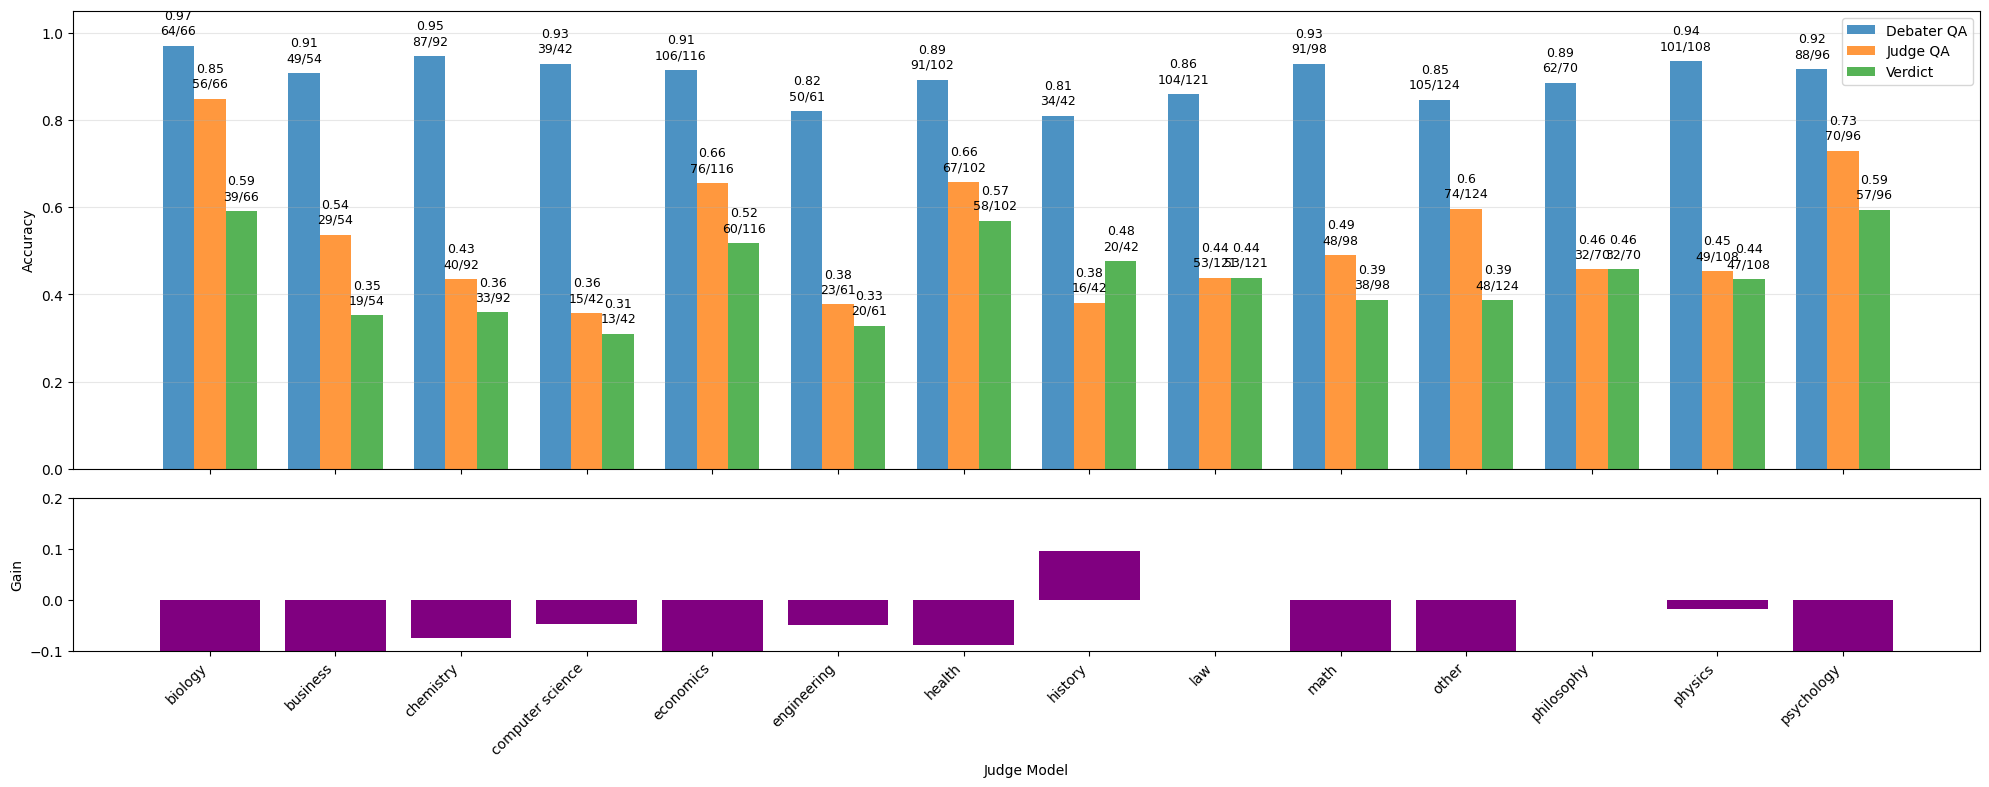

In [4]:
# mmlu_verdict_run_ids = ['4nay3cp', '07e1puy', 'ntxteqy', '9amuk8w']
verdict_run_id = '4nay3cp'

acc_df = aggregate_by_fields(mmlu_df[mmlu_df['verdict_run_id_verdicts'] == verdict_run_id], ['category'])

plot_results_by_name(acc_df, field='category')

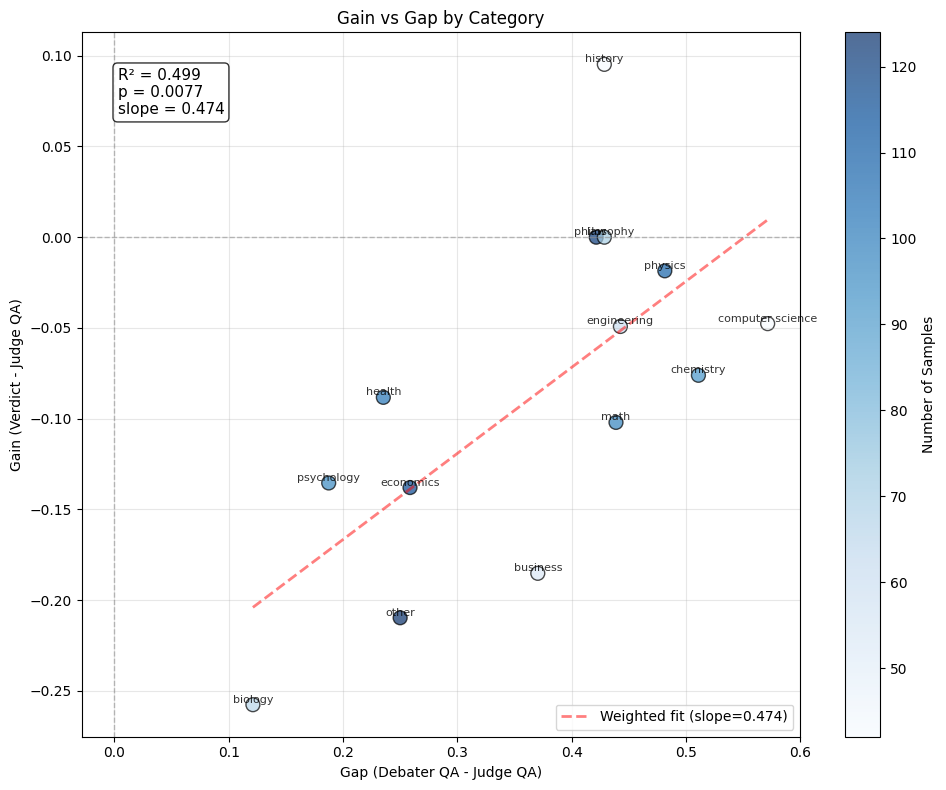

In [5]:
plot_gain_over_gap(acc_df, xfield='gap', yfield='gain')